Javier Alemán Rodríguez

# Predicción de riesgo crediticio de clientes

## Variables

Attribute1 <span style="color: green;">(Categorica)</span>: Estado de la cuenta corriente existente

Attribute2 <span style="color: blue;">(Entera)</span>: Duración (meses)

Attribute3 <span style="color: green;">(Categorica)</span>: Historial crediticio

Attribute4 <span style="color: green;">(Categorica)</span>: Propósito

Attribute5 <span style="color: blue;">(Entera)</span>: Cantidad de crédito

Attribute6 <span style="color: green;">(Categorica)</span>: Cuenta de ahorros

Attribute7 <span style="color: green;">(Categorica)</span>: Empleo actual

Attribute8 <span style="color: blue;">(Entera)</span>: Tasa de pago a plazos en porcentaje del ingreso disponible

Attribute9 <span style="color: green;">(Categorica)</span>: Estado personal y sexo (Estado civil)

Attribute10 <span style="color: green;">(Categorica)</span>: Otros deudores


Attribute11 <span style="color: blue;">(Entera)</span>: Recidencia actual

Attribute12 <span style="color: green;">(Categorica)</span>: Propiedad

Attribute13 <span style="color: blue;">(Entera)</span>: Edad (Años)

Attribute14 <span style="color: green;">(Categorica)</span>: Otros planes de pago

Attribute15 <span style="color: green;">(Categorica)</span>: Alojamiento

Attribute16 <span style="color: blue;">(Entera)</span>: Cuenta de ahorros

Attribute17 <span style="color: green;">(Categorica)</span>: Empleo

Attribute18 <span style="color: blue;">(Entera)</span>: Número de personas responsables de proporcionar mantenimiento a

Attribute19 <span style="color: yellow;">(Binaria)</span>: Teléfono

Attribute20 <span style="color: yellow;">(Binaria)</span>: Trabajor extranjero

<span style="color: red;">Variable objetivo:</span> class <span style="color: yellow;">(Binaria)</span>: 1 = Bueno, 2 = Malo

## Extracción y visualizado de datos

### Instalación e importación de librerías

In [78]:
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from scipy import cluster
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
import matplotlib.cm as cm

### Importación de datos

In [2]:
repository = 'https://raw.githubusercontent.com/JaviARo/Datasets/main/statlog%2Bgerman%2Bcredit%2Bdata/german.data'

german_credit_data = pd.read_csv(repository, sep=' ', header=None)

german_credit_data.columns = [
  'checking_account_status', 
  'duration', 
  'credit_history', 
  'purpose', 
  'credit_amount', 
  'saving_account',
  'present_employment_since',
  'installment_rate',
  'personal_status_and_sex',
  'other_debtors',
  'present_recidence_since',
  'property',
  'age',
  'other_installment_plans',
  'housing',
  'existing_credits',
  'job',
  'people_maintained',
  'telephone',
  'foreing_worker',
  'class'
]

german_credit_data.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,saving_account,present_employment_since,installment_rate,personal_status_and_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,people_maintained,telephone,foreing_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
for columna in german_credit_data.columns:
  num_valores_unicos = german_credit_data[columna].nunique()
  print(f'Número de valores únicos en la columna {columna}: {num_valores_unicos}')

Número de valores únicos en la columna checking_account_status: 4
Número de valores únicos en la columna duration: 33
Número de valores únicos en la columna credit_history: 5
Número de valores únicos en la columna purpose: 10
Número de valores únicos en la columna credit_amount: 921
Número de valores únicos en la columna saving_account: 5
Número de valores únicos en la columna present_employment_since: 5
Número de valores únicos en la columna installment_rate: 4
Número de valores únicos en la columna personal_status_and_sex: 4
Número de valores únicos en la columna other_debtors: 3
Número de valores únicos en la columna present_recidence_since: 4
Número de valores únicos en la columna property: 4
Número de valores únicos en la columna age: 53
Número de valores únicos en la columna other_installment_plans: 3
Número de valores únicos en la columna housing: 3
Número de valores únicos en la columna existing_credits: 4
Número de valores únicos en la columna job: 4
Número de valores únicos e

In [4]:
le = LabelEncoder()

pd.options.mode.copy_on_write = True

categorical_cols = [
  'checking_account_status', 
  'credit_history', 
  'purpose', 
  'saving_account',
  'present_employment_since',
  'personal_status_and_sex',
  'other_debtors',
  'property',
  'other_installment_plans',
  'housing',
  'job',
  'telephone',
  'foreing_worker',
]

for col in categorical_cols: 
	german_credit_data[col] = le.fit_transform(german_credit_data[col])

In [5]:
german_credit_data.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,saving_account,present_employment_since,installment_rate,personal_status_and_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,people_maintained,telephone,foreing_worker,class
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


In [50]:
min_max_scaler = preprocessing.MinMaxScaler()
german_credit_scaled = min_max_scaler.fit_transform(german_credit_data)
german_credit_scaled

array([[0.        , 0.02941176, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.64705882, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.11764706, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.11764706, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.60294118, 0.5       , ..., 1.        , 0.        ,
        1.        ],
       [0.33333333, 0.60294118, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [51]:
# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(german_credit_scaled)
# Mostramos el porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print(pca.explained_variance_ratio_)

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=german_credit_data.columns)

[0.14651311 0.13153894]


,PC-1,PC-2
checking_account_status,-0.501551,-0.224767
duration,0.013202,0.129456
credit_history,-0.161129,-0.060303
purpose,-0.006529,0.002701
credit_amount,-0.014014,0.120005
saving_account,-0.336695,-0.030157
present_employment_since,-0.153076,0.050831
installment_rate,-0.001251,0.096615
personal_status_and_sex,-0.045362,-0.005708
other_debtors,0.056709,-0.047654


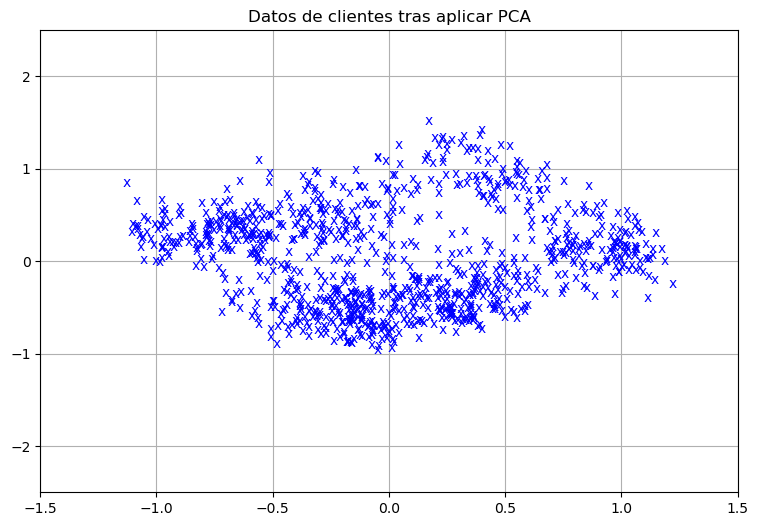

In [52]:
plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color="b")
plt.xlim(-1.5, 1.5)
plt.ylim(-2.5, 2.5)
plt.title("Datos de clientes tras aplicar PCA")
plt.grid()
plt.show()

Distancia Media	   2.01


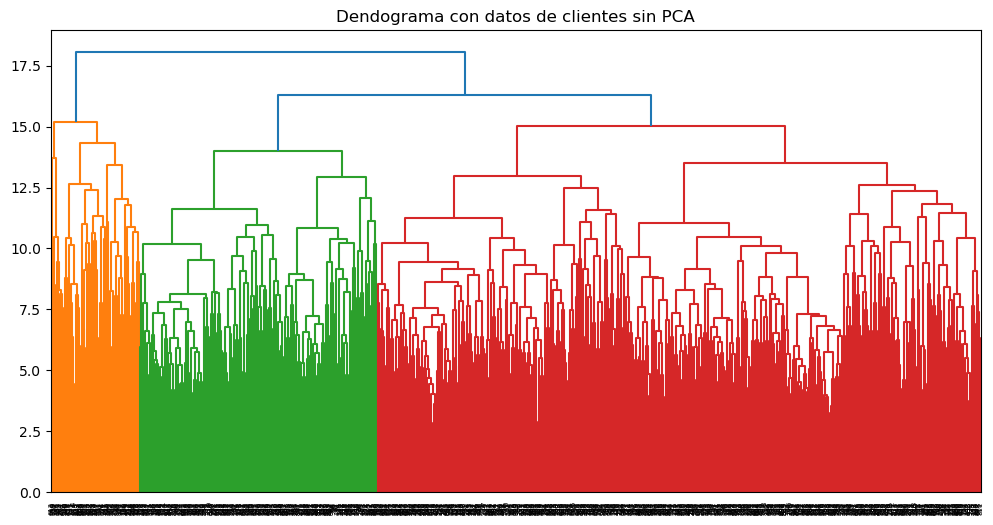

In [53]:
dist = sklearn.metrics.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(german_credit_scaled)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

plt.figure(figsize=(12, 6))
clusters = cluster.hierarchy.linkage(D, method='average')
cluster.hierarchy.dendrogram(clusters, color_threshold=16)
plt.title("Dendograma con datos de clientes sin PCA")
plt.show()

In [54]:
threshold = 16 # ad-hoc
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

# ¿Cuántos grupos hay? Contamos el número de "labels" distintas en el vector
print("Número de clusters {}".format(len(set(labels))))
labels

Número de clusters 3


array([3, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1,
       3, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3,
       1, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 1,
       3, 3, 3, 3, 1, 2, 2, 3, 1, 3, 1, 3, 2, 3, 2, 1, 3, 3, 2, 2, 3, 2,
       1, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3,
       1, 3, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1,
       1, 2, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 2, 1, 3, 1, 2, 3, 3, 3, 3, 3,

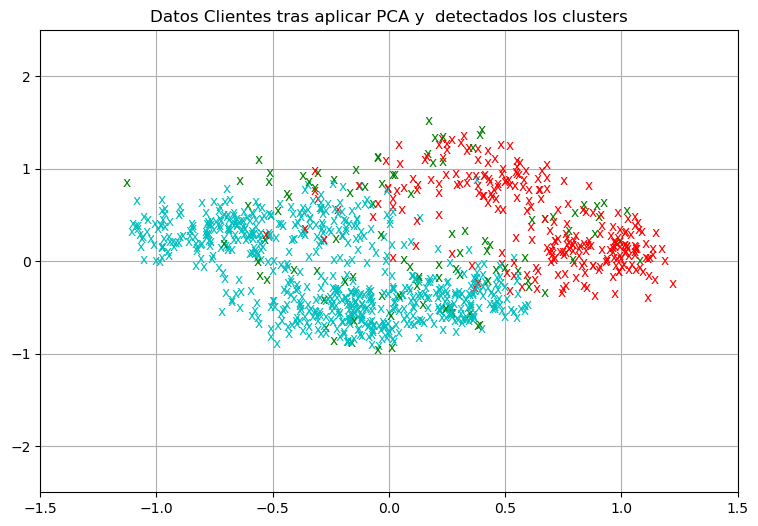

In [55]:
colores = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colores = np.hstack([colores] * 20)

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colores[labels[i]])
plt.xlim(-1.5, 1.5)
plt.ylim(-2.5, 2.5)
plt.grid()
plt.title("Datos Clientes tras aplicar PCA y  detectados los clusters")
plt.show()

### DBSCAN

In [56]:
minPts = 20 # Probar valores 3, 10 y 15
epsilon = 1

dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
labels = dbscan.fit_predict(german_credit_scaled)

In [57]:
labels

array([-1,  1, -1, -1, -1, -1,  0,  2,  0, -1,  1, -1,  2, -1,  0,  1,  0,
       -1, -1, -1,  2, -1, -1,  0, -1, -1,  0,  0,  0, -1, -1,  0,  2, -1,
       -1,  1, -1,  1,  2,  0, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1,  2, -1, -1,  0,
       -1,  0, -1,  2, -1, -1, -1, -1,  1,  0, -1,  0, -1,  2,  0, -1,  0,
       -1,  0, -1, -1,  1,  0,  0, -1,  0, -1, -1,  0,  0,  0, -1,  0,  0,
        0,  2, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  2, -1, -1, -1,
       -1, -1,  2,  0,  2, -1,  0,  0,  1, -1,  1, -1, -1,  0, -1, -1,  2,
        0,  1, -1,  2, -1, -1,  0,  1,  2,  0, -1,  2, -1,  0, -1, -1,  0,
       -1, -1,  1, -1, -1, -1, -1, -1,  0,  2, -1,  0,  2,  1,  0,  2, -1,
       -1,  2, -1, -1,  1, -1,  0,  0, -1,  0, -1, -1, -1,  2, -1,  0, -1,
       -1,  1, -1, -1, -1, -1,  0, -1, -1,  2, -1, -1, -1,  2,  0,  0, -1,
       -1, -1,  2,  0, -1, -1, -1,  2, -1, -1,  2, -1, -1,  2,  0,  2, -1,
       -1,  0, -1,  2,  0

In [14]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print ('Number of clusters %d' % n_clusters)

Number of clusters 3


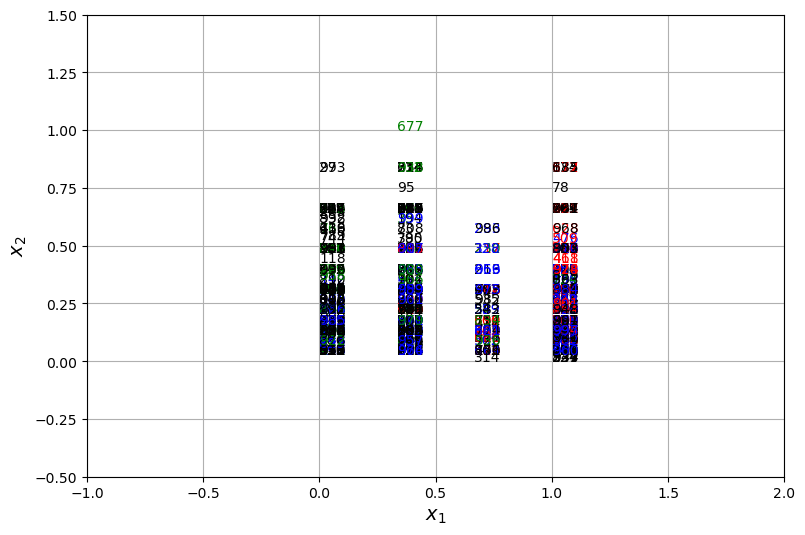

In [58]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
numbers = np.arange(len(german_credit_scaled))
plt.figure(figsize=(9, 6))
for i in range(len(german_credit_scaled)):
    plt.text(german_credit_scaled[i][0], german_credit_scaled[i][1], numbers[i], color=colors[labels[i]])
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-1, 2)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

## KMeans

In [73]:
warnings.filterwarnings('ignore', category=UserWarning)

def k_means(df, k):
	model = KMeans(n_clusters = k, n_init='auto', random_state=10)
	model.fit(df)
	pred = model.predict(df)
	score = silhouette_score(df, pred)

	print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))
	return model, pred

### Gráfica de KMeans

In [62]:
def k_means_plot(df, k):
	# Crea una subparcela con 1 fila y 2 columnas
	fig, (ax1, ax2) = plt.subplots(1, 2)
	fig.set_size_inches(18, 7)

	# La primera subtrama es la trama de silueta
	# El coeficiente de silueta puede oscilar entre -1, 1 pero en este ejemplo todos
	# se encuentran dentro de [-0.1, 1]
	ax1.set_xlim([-0.1, 1])
	# El (n_clusters + 1) * 10 es para insertar un espacio en blanco entre la silueta
	# parcelas de conglomerados individuales, para demarcarlas claramente.
	ax1.set_ylim([0, len(df) + (k + 1) * 10])



	# Inicialice el clusterer con el valor n_clusters y un generador aleatorio
	# semilla de 10 para reproducibilidad.
	clusterer = KMeans(n_clusters=k, n_init='auto', random_state=10)
	cluster_labels = clusterer.fit_predict(df)

	# Silhouette_score da el valor promedio de todas las muestras.
	# Esto da una perspectiva de la densidad y separación de la forma
	# clusters
	silhouette_avg = silhouette_score(df, cluster_labels)
	print("For n_clusters =", k,
				"The average silhouette_score is :", silhouette_avg)

	# Calcule las puntuaciones de silueta para cada muestra
	sample_silhouette_values = silhouette_samples(df, cluster_labels)


	y_lower = 10
	for i in range(k):
		# Agregue las puntuaciones de silueta para muestras pertenecientes a
		# agrupe i, y ordénelos
		ith_cluster_silhouette_values = \
				sample_silhouette_values[cluster_labels == i]

		ith_cluster_silhouette_values.sort()

		size_cluster_i = ith_cluster_silhouette_values.shape[0]
		y_upper = y_lower + size_cluster_i

		color = cm.nipy_spectral(float(i) / k)
		ax1.fill_betweenx(np.arange(y_lower, y_upper),
											0, ith_cluster_silhouette_values,
											facecolor=color, edgecolor=color, alpha=0.7)

		# Etiquete las parcelas de silueta con sus números de grupo en el medio
		ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

		# Calcule el nuevo y_lower para la siguiente parcela
		y_lower = y_upper + 10  # 10 para las 0 muestras

	ax1.set_title("The silhouette plot for the various clusters.")
	ax1.set_xlabel("The silhouette coefficient values")
	ax1.set_ylabel("Cluster label")

	# La línea vertical para la puntuación de silueta promedio de todos los valores
	ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

	ax1.set_yticks([])  # Borrar las etiquetas / ticks de yaxis
	ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

	# 2do Gráfico que muestra los grupos reales formados
	colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
	print(type(df))
	ax2.scatter(df[:, 0], df[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

	# Etiquetado de los clusters
	centers = clusterer.cluster_centers_
	# Dibuja círculos blancos en los centros de los grupos
	ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
							c="white", alpha=1, s=200, edgecolor='k')

	for i, c in enumerate(centers):
			ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
									s=50, edgecolor='k')

	ax2.set_title("The visualization of the clustered data.")
	ax2.set_xlabel("Feature space for the 1st feature")
	ax2.set_ylabel("Feature space for the 2nd feature")

	plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
								"with k = %d" % k),
								fontsize=14, fontweight='bold')

	plt.show()

### Sin PCA (escalado)

In [64]:
k_nums = range(2, 11)

for k in k_nums:
	k_means(german_credit_scaled, k)

Silhouette Score for k = 2: 0.130
Silhouette Score for k = 3: 0.130
Silhouette Score for k = 4: 0.094
Silhouette Score for k = 5: 0.091
Silhouette Score for k = 6: 0.107
Silhouette Score for k = 7: 0.105
Silhouette Score for k = 8: 0.097
Silhouette Score for k = 9: 0.096
Silhouette Score for k = 10: 0.089


For n_clusters = 2 The average silhouette_score is : 0.1299747826563039
<class 'numpy.ndarray'>


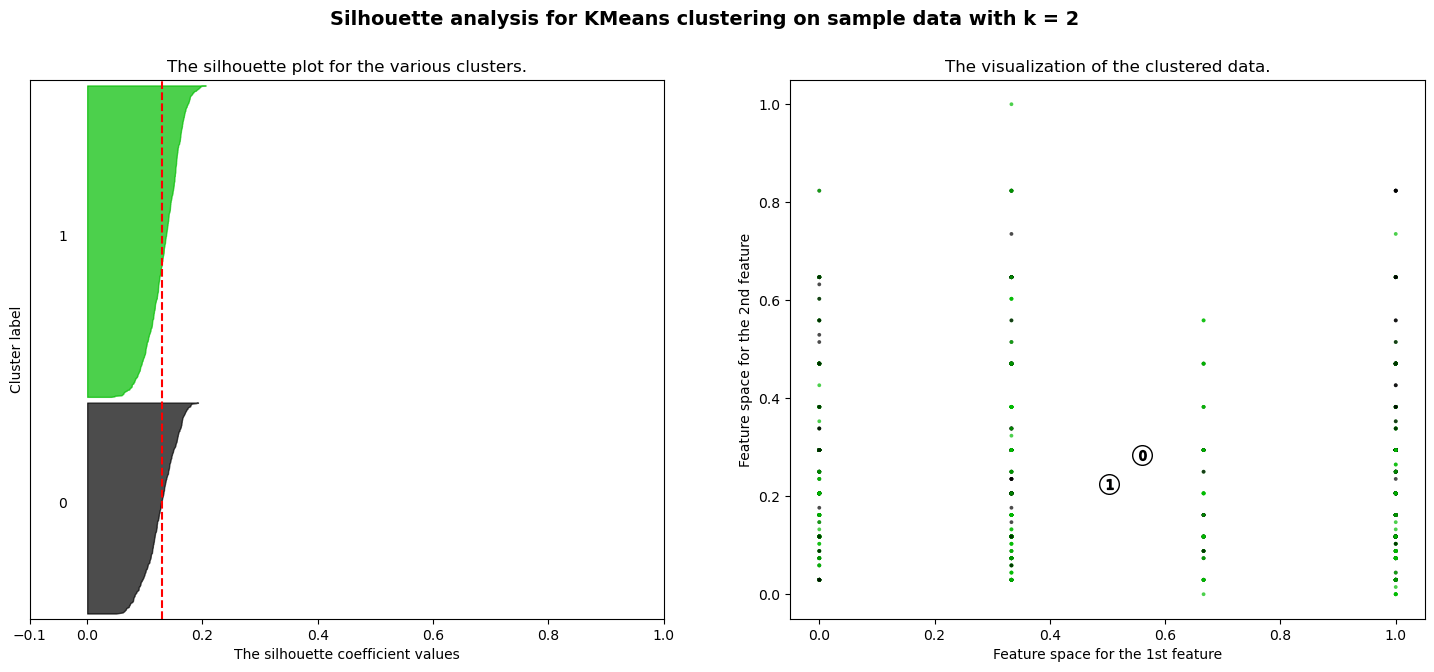

In [65]:
k_means_plot(german_credit_scaled, 2)

### Sin PCA (no escalado)

In [66]:
k_nums = range(2, 11)

for k in k_nums:
	k_means(german_credit_data.values, k)

Silhouette Score for k = 2: 0.722
Silhouette Score for k = 3: 0.648
Silhouette Score for k = 4: 0.612
Silhouette Score for k = 5: 0.597
Silhouette Score for k = 6: 0.576
Silhouette Score for k = 7: 0.578
Silhouette Score for k = 8: 0.560
Silhouette Score for k = 9: 0.532
Silhouette Score for k = 10: 0.570


For n_clusters = 2 The average silhouette_score is : 0.7216417560787936
<class 'numpy.ndarray'>


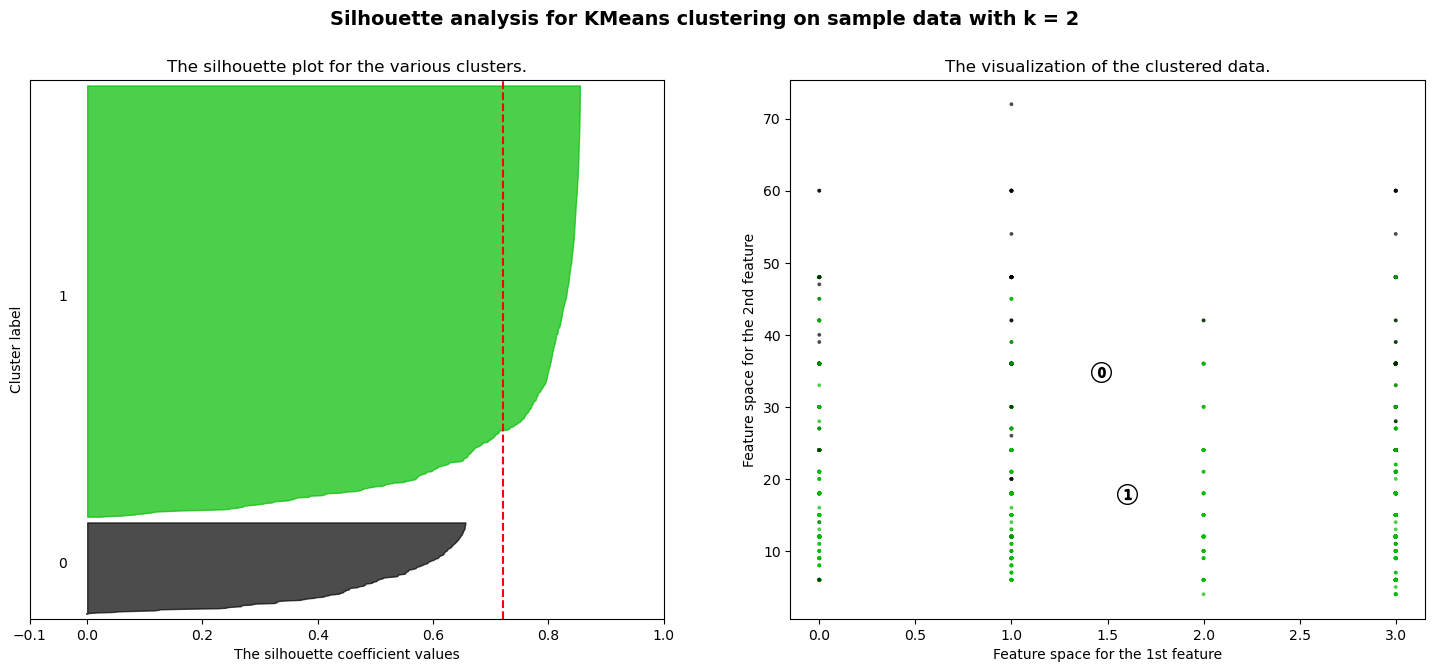

In [67]:
k_means_plot(german_credit_data.values, 2)

### Con PCA (escalado)

In [68]:
k_nums = range(2, 11)

for k in k_nums:
	k_means(X_pca, k)

Silhouette Score for k = 2: 0.389
Silhouette Score for k = 3: 0.483
Silhouette Score for k = 4: 0.493
Silhouette Score for k = 5: 0.464
Silhouette Score for k = 6: 0.446
Silhouette Score for k = 7: 0.435
Silhouette Score for k = 8: 0.402
Silhouette Score for k = 9: 0.348
Silhouette Score for k = 10: 0.368


For n_clusters = 4 The average silhouette_score is : 0.4932103904095624
<class 'numpy.ndarray'>


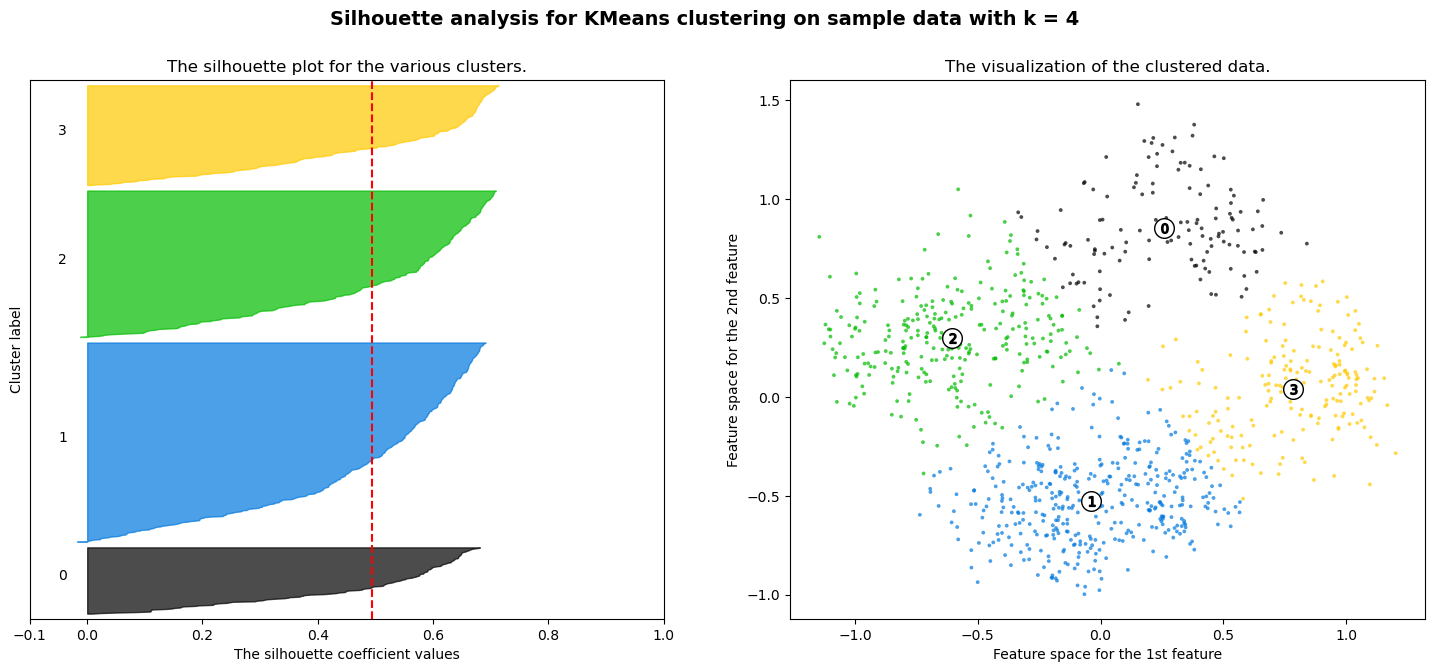

In [69]:
k_means_plot(X_pca, 4)

### Con PCA (no escalado)

In [70]:
pca = PCA(n_components = 2)
X_pca_not_scaled = pca.fit_transform(german_credit_data)

k_nums = range(2, 11)

for k in k_nums:
	k_means(X_pca_not_scaled, k)

Silhouette Score for k = 2: 0.722
Silhouette Score for k = 3: 0.657
Silhouette Score for k = 4: 0.612
Silhouette Score for k = 5: 0.597
Silhouette Score for k = 6: 0.577
Silhouette Score for k = 7: 0.578
Silhouette Score for k = 8: 0.561
Silhouette Score for k = 9: 0.535
Silhouette Score for k = 10: 0.571


For n_clusters = 2 The average silhouette_score is : 0.7216807872445529
<class 'numpy.ndarray'>


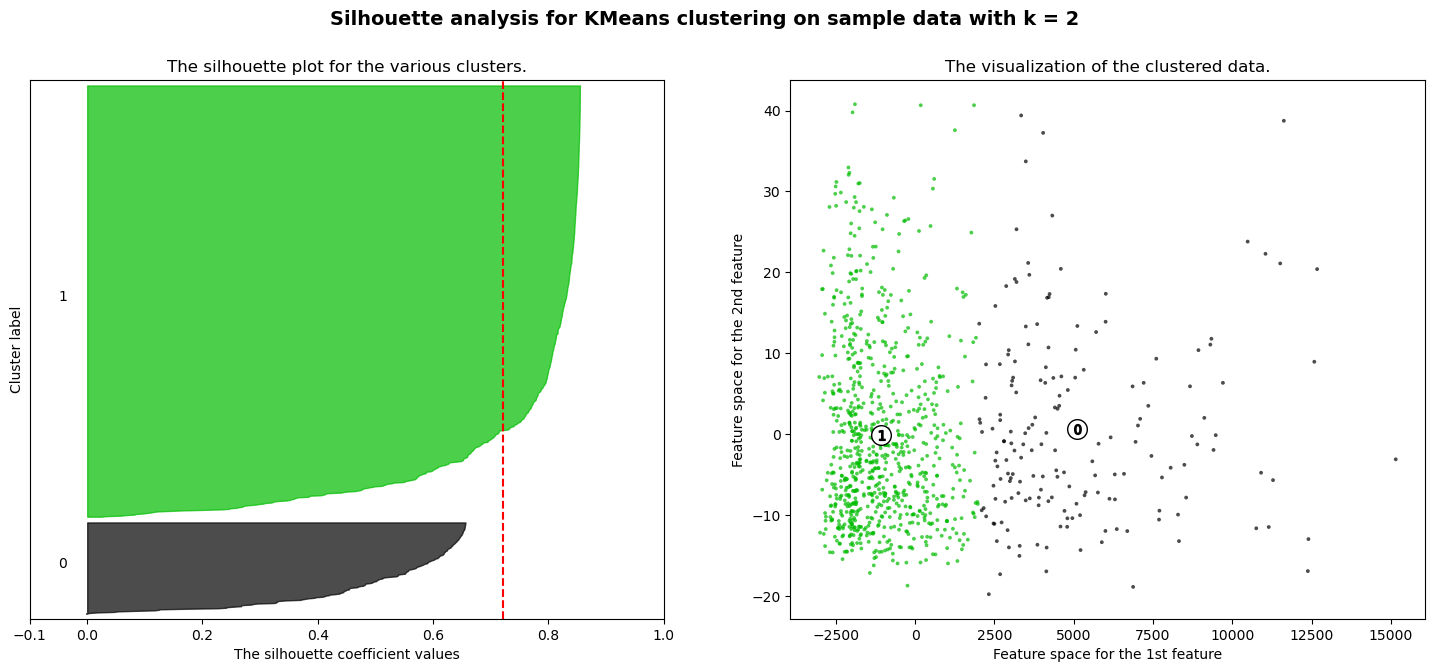

In [71]:
k_means_plot(X_pca_not_scaled, 2)

In [74]:
model, pred = k_means(X_pca_not_scaled, 2)

Silhouette Score for k = 2: 0.722


In [75]:
pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [76]:
german_credit_data["cluster"] = pred

In [77]:
german_credit_data

,checking_account_status,duration,credit_history,purpose,credit_amount,saving_account,present_employment_since,installment_rate,personal_status_and_sex,other_debtors,...,age,other_installment_plans,housing,existing_credits,job,people_maintained,telephone,foreing_worker,class,cluster
0,0,6,4,4,1169,4,4,4,2,0,...,67,2,1,2,2,1,1,0,1,1
1,1,48,2,4,5951,0,2,2,1,0,...,22,2,1,1,2,1,0,0,2,0
2,3,12,4,7,2096,0,3,2,2,0,...,49,2,1,1,1,2,0,0,1,1
3,0,42,2,3,7882,0,3,2,2,2,...,45,2,2,1,2,2,0,0,1,0
4,0,24,3,0,4870,0,2,3,2,0,...,53,2,2,2,2,2,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,3,1736,0,3,3,1,0,...,31,2,1,1,1,1,0,0,1,1
996,0,30,2,1,3857,0,2,4,0,0,...,40,2,1,1,3,1,1,0,1,1
997,3,12,2,4,804,0,4,4,2,0,...,38,2,1,1,2,1,0,0,1,1
998,0,45,2,4,1845,0,2,4,2,0,...,23,2,2,1,2,1,1,0,2,1


In [79]:
german_credit_data.to_excel('german_credit_clustered.xlsx', index=False, engine='openpyxl')